# ELE510 Image Processing with robot vision: LAB, Exercise  4, Spatial-domain filtering

**Purpose:** *To learn about Linear Filters and Local Image Features and its use in computer vision (image processing). Some basic experiments will be implemented using Pyhon, OpenCV and other packages.*

The theory for this exercise can be found in chapter 5 of the text book [1]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)


**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

In this problem we want to get a better understanding of linear filtering using convolution. 

**The computations should be done by hand on paper until you are confident that you know how to do it.** 

Thereafter you can use the notebook to complete and check the results.

**Sobel** and **Prewitt** masks are used to compute the two components of the gradient. 
They perform differentiation over a 3 pixel region in the horizontal (x) and vertical (y) direction respectively and smooth by a 3 pixel smoothing filter in the other direction. 
The masks represent separable 2D filters and can thereby be separated in a differentiation filter and a smoothing filter.

The **Sobel masks**:
\begin{equation}\label{L3-eq6}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 2\; & 0\; & -2 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\\ 0 & 0 & 0 \\
      -1 & -2 & -1\end{bmatrix}.
\end{equation}

The **Prewitt masks**:
\begin{equation}\label{L3-eq7}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}

**a)** Find the 1D **differentiation filter** and the 1D **smoothing filter** for the Sobel and Prewitt masks. The result will be similar for the x- and y-direction. It is therefore sufficient to find the result for one of the directions, e.g. the x-direction.

Consider the following image:

\begin{equation}\label{Lab2eq6}
    {\mathbf Im} = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 1 & 0\\
        0 & 0 & 1 & 1 & 0 & 0\\0 & 0 & 1 & 1 & 0 & 0\\
        0 & 1 & 0 & 0 & 1 & 0\\0 & 0 &  0 & 0 & 0 & 0\end{bmatrix}.
\end{equation}





### Solution:
Prewitt and Soberl mask are seperable kernels, this mean we can represent them as the outer product of 2 1D kernels, in this case they are composed by 1D smooting kernel and 1D differentiation kernel.

The **Prewitt mask** is composed by the following filters:

\begin{equation}
    \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix} = \begin{bmatrix} 1\\1\\1\end{bmatrix} \otimes
      \begin{bmatrix}1\; & 0\; & -1\end{bmatrix}
\end{equation}

Where $[1, 1, 1]$ is the smoothing filter and $[1, 0, -1]$ is the differentiation filter

The **Sobel mask** is composed by the following filters:

\begin{equation}
    \begin{bmatrix} 1\; & 0\; & -1\\ 2\; & 0\; & -2 \\
      1\; & 0\; & -1\end{bmatrix} = \begin{bmatrix} 1\\2\\1\end{bmatrix} \otimes
      \begin{bmatrix}1\; & 0\; & -1\end{bmatrix}
\end{equation}

Where $[1, 2, 1]$ is the smoothing filter and $[1, 0, -1]$ is the differentiation filter

**b)** Filter this image using the **Prewitt** masks. Find the two output images, representing the differential along the horizontal and vertical directions.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. Since the mask is not symmetric, it should be flipped before apply the convolution operation with the image.
</details>

### Solution:

We must remember to flip the kernel when it's not symmetric

\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix} \implies {\mathbf h}_{x}= \begin{bmatrix} -1\; & 0\; & 1\\ -1\; & 0\; & 1 \\
      -1\; & 0\; & 1\end{bmatrix}
\end{equation}

For the vertical mask this won't be necesary

\begin{equation}
    {\mathbf h}_{y}= \begin{bmatrix} 1\; & 1\; & 1\\ 0\; & 0\; & 0 \\
      -1\; & -1\; & -1\end{bmatrix}
\end{equation}

Applying convolution we obtain the following results:

\begin{equation}
   {\mathbf Im \circledast h}_{x} = \begin{bmatrix} 1 & 0 & -1 & 1 & 0 & -1\\1 & 1 & 0 & 0 & -1 & -1\\
        1 & 2 & 1 & -1 & -2 & -1\\1 & 2 & 1 & -1 & -2 & -1\\
        1 & 1 & 0 & 0 & -1 & -1\\1 & 0 & -1 & 1 & 0 & -1\end{bmatrix}. \qquad
        {\mathbf Im \circledast h}_{y} = \begin{bmatrix} -1 & -1 & -1 & -1 & -1 & -1\\0 & -1 & -2 & -2 & -1 & 0\\
        1 & 0 & -1 & -1 & 0 & 1\\-1 & 0 & 1 & 1 & 0 & -1\\
        0 & 1 & 2 & 2 & 1 & 0\\1 & 1 & 1 & 1 & 1 & 1\end{bmatrix}.
\end{equation}

**c)** Filter this image using the **Sobel** masks. Find the two output images, representing the differential along the horizontal and vertical directions.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. Since the mask is not symmetric, it should be flipped before apply the convolution operation with the image.
</details>

### Solution:

Don't forget to flip asymmetric kernels

\begin{equation}
    {\mathbf h}_{x} = \begin{bmatrix} 1\; & 0\; & -1\\ 2\; & 0\; & -2 \\
      1\; & 0\; & -1\end{bmatrix} \implies {\mathbf h}_{x} = \begin{bmatrix} -1\; & 0\; & 1\\ -2\; & 0\; & 2 \\
      -1\; & 0\; & 1\end{bmatrix}
\end{equation}

One more time, the vertical kernel is symmetric, so we don't need to flip it

\begin{equation}
    {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\\ 0 & 0 & 0 \\
      -1 & -2 & -1\end{bmatrix}.
\end{equation}

Applying the convolution, the obtained output image is as follows:

\begin{equation}
   {\mathbf Im \circledast h}_{x} = \begin{bmatrix} 1 & 0 & -1 & 1 & 0 & -1\\2 & 1 & -1 & 1 & -1 & -2\\
        1 & 3 & 2 & -2 & -3 & -1\\1 & 3 & 2 & -2 & -3 & -1\\
        2 & 1 & -1 & 1 & -1 & -2\\1 & 0 & -1 & 1 & 0 & -1\end{bmatrix}. \qquad
        {\mathbf Im \circledast h}_{y} = \begin{bmatrix} -1 & -2 & -1 & -1 & -2 & -1\\0 & -1 & -3 & -3 & -1 & 0\\
        1 & 1 & -2 & -2 & 1 & 1\\-1 & -1 & 2 & 2 & -1 & -1\\
        0 & 1 & 3 & 3 & 1 & 0\\1 & 2 & 1 & 1 & 2 & 1\end{bmatrix}.
\end{equation}


**d)** Compute the gradient, $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$, images based on the **Prewitt** and **Sobel** masks.


### Solution for the Prewitt mask:

In [1]:
import numpy as np

In [2]:
# Define the differentials of Sobel
Ix = np.array([[1,0,-1,1,0,-1],[1,1,0,0,-1,-1],[1,2,1,-1,-2,-1],[1,2,1,-1,-2,-1],[1,1,0,0,-1,-1],[1,0,-1,1,0,-1]])
Iy = np.array([[-1,-1,-1,-1,-1,-1],[0,-1,-2,-2,-1,0],[1,0,-1,-1,0,1],[-1,0,1,1,0,-1],[0,1,2,2,1,0],[1,1,1,1,1,1]])

# Compute gradient image
I_gradient = (Ix**2 + Iy**2)**(1/2)
print(np.matrix.round(I_gradient, decimals=4))

[[1.4142 1.     1.4142 1.4142 1.     1.4142]
 [1.     1.4142 2.     2.     1.4142 1.    ]
 [1.4142 2.     1.4142 1.4142 2.     1.4142]
 [1.4142 2.     1.4142 1.4142 2.     1.4142]
 [1.     1.4142 2.     2.     1.4142 1.    ]
 [1.4142 1.     1.4142 1.4142 1.     1.4142]]


The resulting gradient images is something like this:

\begin{equation}
    {\mathbf \|\nabla I\|} = \begin{bmatrix} 1.4142 & 1 & 1.4142 & 1.4142 & 1 & 1.4142\\
         1 & 1.4142 & 2 & 2 & 1.4142 & 1\\1.4142 & 2 & 1.4142 & 1.4142 & 2 & 1.4142\\
         1.4142 & 2 & 1.4142 & 1.4142 & 2 & 1.4142\\1 & 1.4142 & 2 & 2 & 1.4142 & 1\\
         1.4142 & 1 & 1.4142 & 1.4142 & 1 & 1.4142\end{bmatrix}.
\end{equation}

### Solution for the Sobel mask:

In [3]:
# Define the differentials of Sobel
Ix = np.array([[1,0,-1,1,0,-1],[2,1,-1,1,-1,-2],[1,3,2,-2,-3,-1],[1,3,2,-2,-3,-1],[2,1,-1,1,-1,-2],[1,0,-1,1,0,-1]])
Iy = np.array([[-1,-2,-1,-1,-2,-1],[0,-1,-3,-3,-1,0],[1,1,-2,-2,1,1],[-1,-1,2,2,-1,-1],[0,1,3,3,1,0],[1,2,1,1,2,1]])

# Compute gradient image
I_gradient = (Ix**2 + Iy**2)**(1/2)
print(np.matrix.round(I_gradient, decimals=4))

[[1.4142 2.     1.4142 1.4142 2.     1.4142]
 [2.     1.4142 3.1623 3.1623 1.4142 2.    ]
 [1.4142 3.1623 2.8284 2.8284 3.1623 1.4142]
 [1.4142 3.1623 2.8284 2.8284 3.1623 1.4142]
 [2.     1.4142 3.1623 3.1623 1.4142 2.    ]
 [1.4142 2.     1.4142 1.4142 2.     1.4142]]


The resulting gradient images is something like this:

\begin{equation}
    {\mathbf \|\nabla I\|} = \begin{bmatrix} 1.4142 & 2 & 1.4142 & 1.4142 & 2 & 1.4142\\
         2 & 1.4142 & 3.1623 & 3.1623 & 1.4142 & 2\\1.4142 & 3.1623 & 2.8284 & 2.8284 & 3.1623 & 1.4142\\
         1.4142 & 3.1623 & 2.8284 & 2.8284 & 3.1623 & 1.4142\\2 & 1.4142 & 3.1623 & 3.1623 & 1.4142 & 2\\
         1.4142 & 2 & 1.4142 & 1.4142 & 2 & 1.4142\end{bmatrix}.
\end{equation}


**e)** How will you interpret the results with respect to edges in the test image?

We can see in both resulting images that we have the greater intensity values in the edges of the image. With the gradient image we can find the edges of the image in a very easy way.


## Problem 2

Given a test image with black background (gray level 0), and a white rectangle (gray level value 1), of size $6 \times 8$ pixels in the center. 
Use the notebook to create a matrix representing this image. 

Let the test image be of size $10 \times 12$. 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
<div class="alert alert-block alert-info">
The test image can be created by the following numpy commands: 
    
```python
R = np.ones(shape=(6,8))
I = np.zeros(shape=(10,12))
I[2:8,2:10] = R
```
</div>
</details>



Use the notebook to do the necessary computations in the following questions.

Use the Prewitt masks:
\begin{equation}\label{L4-eq1}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}

for the computation of the differentials, $\frac{\partial I}{\partial x} = I_{x}$ and $\frac{\partial I}{\partial y} = I_{y}$ respectively.


**a)** Compute and sketch the gradient of the test image using the 2-norm for the magnitude. Use $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$. Show all relevant pixel values in the magnitude gradient image. 


<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
Use <code>cv2.filter2D</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">Documentation</a>) to perform a convolutional operation on an image using a specific mask.

</details>

In [4]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import math

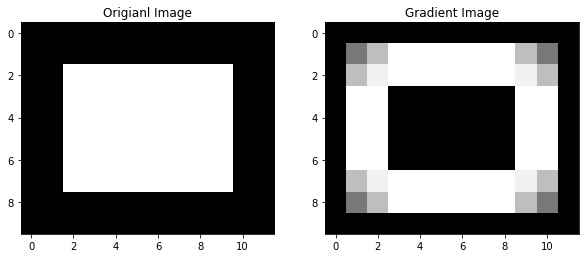

In [5]:
# Create the image
rect = np.ones(shape=(6, 8))
img = np.zeros(shape=(10, 12))
img[2:8, 2:10] = rect

# Define the kernels
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

# Perform filtering with the Prewitt mask
Ix = cv2.filter2D(img, -1, kernelx)
Iy = cv2.filter2D(img, -1, kernely)

# Compute the gradient
Ig = (Ix**2 + Iy**2)**(1/2)

# Plot results
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Origianl Image")
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.title("Gradient Image")
plt.imshow(Ig, cmap="gray")
plt.show()


**b)** Sketch the histogram of gradient directions (**in degrees**).

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>

The <code>numpy.arctan2</code> function (<a href="https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html">Documentation</a>) might be useful for this task to convert the x-y coordinates into radiants. 

</details>

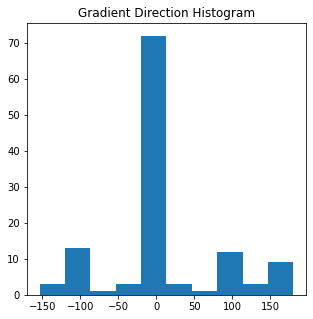

In [6]:
# Compute gradient image direction
Ig_dir = np.arctan2(Iy,Ix)

# Get degrees
Ig_dir = Ig_dir*(180/np.pi)

# Plot results
plt.figure(figsize=(5,5))
plt.title("Gradient Direction Histogram")
plt.hist(Ig_dir.flatten())
plt.show()

The Laplacian can be computed using the following mask:
\begin{equation}\label{L4-eq2}
    {\mathbf h}_{L}=
    \begin{bmatrix} 0 & -1 & 0\\ -1 & 4 & -1\\ 0 & -1 & 0\end{bmatrix},
\end{equation}


**c)** Sketch the Laplacian of the test image using the mask in previous equation. Show all relevant pixel values in the Laplacian image.


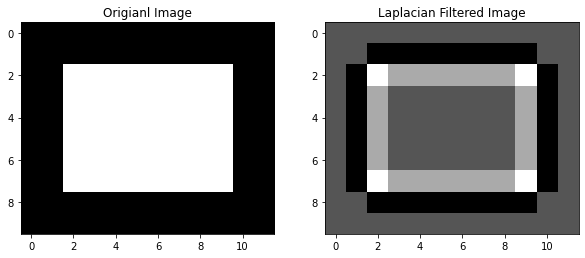

In [7]:
# Define the mask
lp_mask = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

# Apply the mask to the image
I_lp = cv2.filter2D(img, -1, lp_mask)

# Plot results
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Origianl Image")
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.title("Laplacian Filtered Image")
plt.imshow(I_lp, cmap="gray")
plt.show()

**d)** What is the resulting mask for computation of the Laplacian if the Prewitt masks are used for computation of the differentials? 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    </font>
</summary>

- Import the <code>scipy</code>  package and use the <code>convolve2d</code> function (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html">Documentation</a>) for this task.

- If you want to check if the resulting mask is correct, use the built-in cv2 <code>cv2.Laplacian(I, -1, ksize=5)</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6">Documentation</a>) where <code>I</code> is the test image and <code>ksize</code> is the aperture size used to compute the second-derivative filters. The visualization of the two masks should be almost identical (although the pixel values are different).
</details>


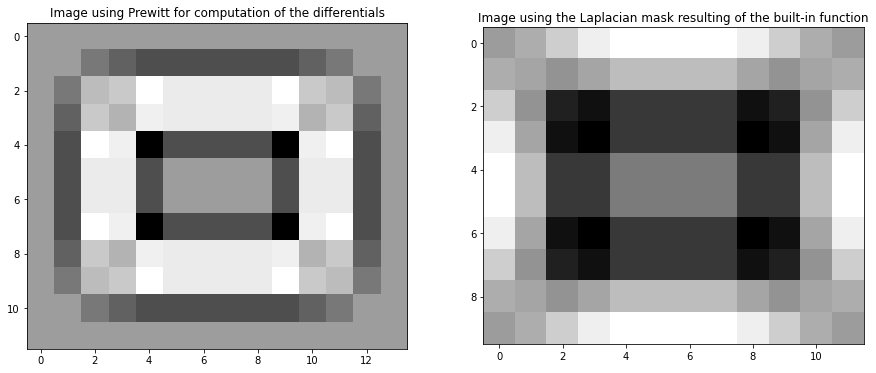

In [8]:
import scipy.signal

# Convolve the gradient image with the laplacian mask
img_lp = scipy.signal.convolve2d(Ig, lp_mask)

# Get the image filtered with laplacian with the built-in function
Laplacian = cv2.Laplacian(img, -1, ksize=5)

# Plot results
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Image using Prewitt for computation of the differentials")
plt.imshow(img_lp, cmap="gray")
plt.subplot(1,2,2)
plt.title("Image using the Laplacian mask resulting of the built-in function")
plt.imshow(Laplacian, cmap="gray")
plt.show()


## Problem 3

One of the most common linear filters in computer vision applications is the Gaussian smoothing filter. 

In this problem we want to study the use of Gaussian filters with different standard deviations, $\sigma$, and different sizes, $K \times K$, where $K$ is odd ($K = 2k+1$, $k$ is integer). 
The filter kernel (mask) is found by using the OpenCV function `cv2.getGaussianKernel()` ([Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))). 
Start by finding filter masks as follows

**a)** **h1**: $\sigma = 1$, $K = 9$

**b)** **h15**: $\sigma = 1.5$, $K = 11$

**c)** **h2**: $\sigma = 2$, $K = 15$

Use the `plt.stem()` function from Matplotlib and display each filter (sampled 1D Gaussian function). 

If the size $K$ is too small we will get a truncated Gaussian with a step at the tails. 

**d)** Show the result for c) above when $K = 9$.

If we want a proper Gaussian filter there is a connection between the value of $\sigma$ and the size $K$. 
At three standard deviations, $3\sigma$, the value of the Gaussian is 1\% of its maximum value.


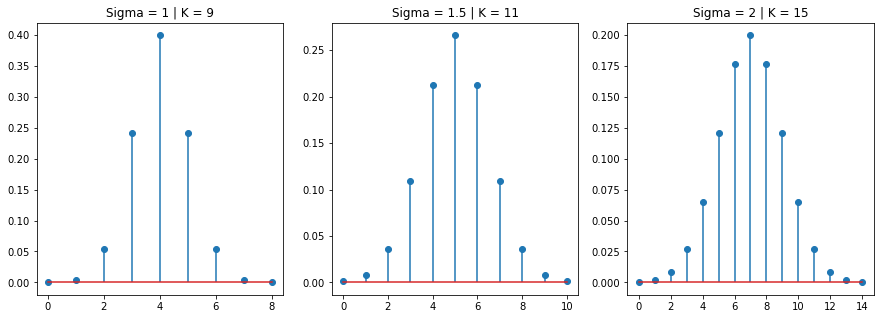

In [9]:
# Section a)
h1 = cv2.getGaussianKernel(ksize=9, sigma=1)
# Section b)
h15 = cv2.getGaussianKernel(ksize=11, sigma=1.5)
# Section c)
h2 = cv2.getGaussianKernel(ksize=15, sigma=2)

# Plot the results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Sigma = 1 | K = 9')
plt.stem(h1)
plt.subplot(1,3,2)
plt.title('Sigma = 1.5 | K = 11')
plt.stem(h15)
plt.subplot(1,3,3)
plt.title('Sigma = 2 | K = 15')
plt.stem(h2)
plt.show()

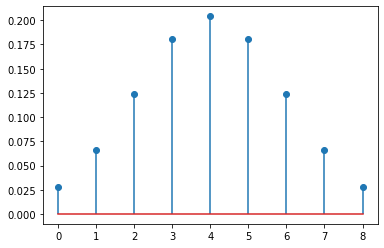

In [10]:
# Section d)
hd = cv2.getGaussianKernel(ksize=9, sigma=2)

# Plot results
plt.stem(hd)
plt.show()


## Problem 4

In this exercise we want to study how two well-known filters perform on noise removal, namely the Gaussian and the median filter. 
```python
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0.05, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels
```

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>

You can filter an image with the OpenCV built-in functions in three different ways: 

- Use <code>cv2.sepFilter2D()</code> using the <code>kernelX</code> and <code>kernelY</code> parameters.

- Use the <code>cv2.filter2D()</code> using a 2D filter. 

- Perform 2 steps of <code>cv2.filter2D()</code> with the same(*) 1D filter.

(*) The second time, the 1D filter should be transposed.
</details>



**a)** Apply Gaussian smoothing to the original image, `Im`,  using the defined filter kernels from problem 3. Explain the results.

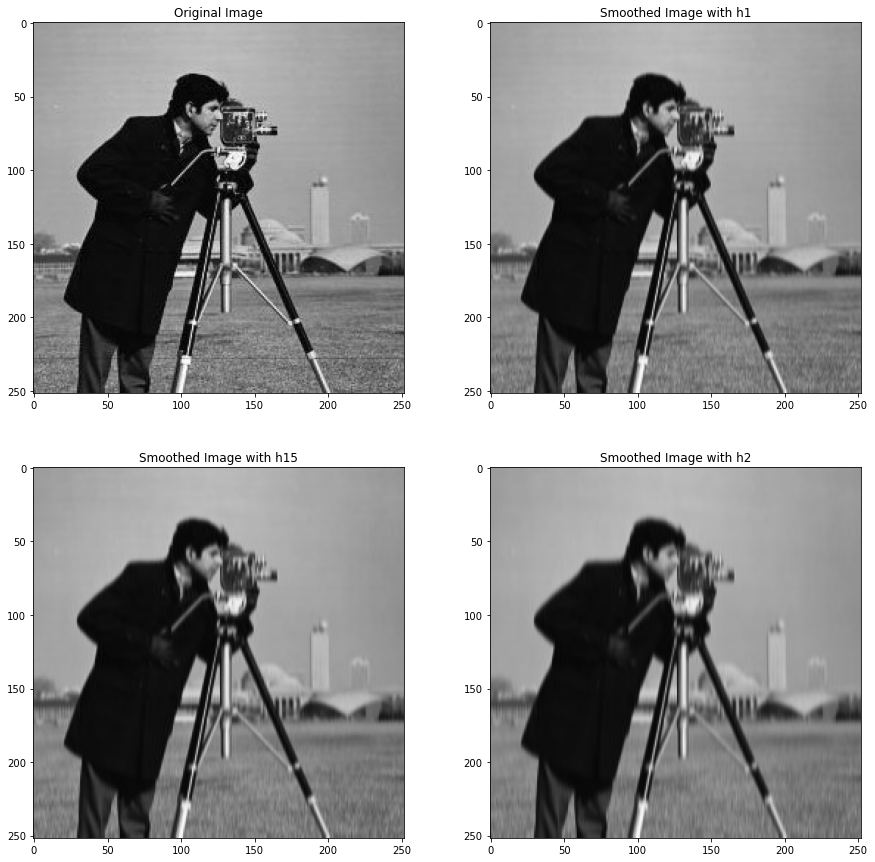

In [11]:
from skimage.util import random_noise

# Read the image
Im = cv2.imread('./images/cameraman.jpg')

# Apply the different kernels from problem 3
Im_smooth_h1 = cv2.filter2D(Im, -1, h1)
Im_smooth_h15 = cv2.filter2D(Im, -1, h15)
Im_smooth_h2 = cv2.filter2D(Im, -1, h2)

# Plot the results
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(Im)
plt.subplot(2,2,2)
plt.title('Smoothed Image with h1')
plt.imshow(Im_smooth_h1)
plt.subplot(2,2,3)
plt.title('Smoothed Image with h15')
plt.imshow(Im_smooth_h15)
plt.subplot(2,2,4)
plt.title('Smoothed Image with h2')
plt.imshow(Im_smooth_h2)
plt.show()

Notice we lose edge definition the more sigma we set for the gaussian filter. Smoothing filters are also known as **lowpass filters**, we keep the low frequencies and filter the high frequencies, this result on edge blurring, averaging and noise reduction.

Gaussian noise:

**b)** Apply the three Gaussian filters, described in problem 3, to the image `Im_gauss`. Explain the results.

**c)** Apply a median filter on the image `Im_gauss` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?


### Solution for section b)

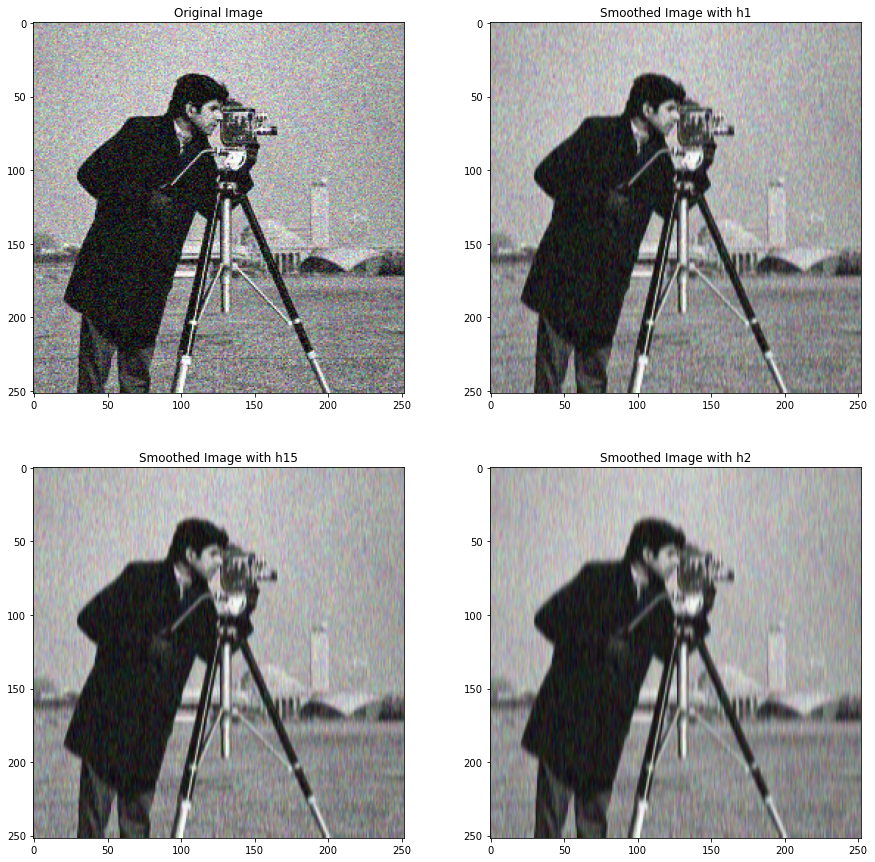

In [12]:
# Generate some gaussian noise on the image
Im_gauss = random_noise(Im, mode='gaussian', mean=0.05, var=0.01)

# Apply the different kernels from problem 3
ImG_smooth_h1 = cv2.filter2D(Im_gauss, -1, h1)
ImG_smooth_h15 = cv2.filter2D(Im_gauss, -1, h15)
ImG_smooth_h2 = cv2.filter2D(Im_gauss, -1, h2)

# Plot the results
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(Im_gauss)
plt.subplot(2,2,2)
plt.title('Smoothed Image with h1')
plt.imshow(ImG_smooth_h1)
plt.subplot(2,2,3)
plt.title('Smoothed Image with h15')
plt.imshow(ImG_smooth_h15)
plt.subplot(2,2,4)
plt.title('Smoothed Image with h2')
plt.imshow(ImG_smooth_h2)
plt.show()

In this case we can check what we have commented on "section a)", applying gauss filter implies noise reduction but also a loss in edge definition, if we try to substract all the noise we will end up with a too blur image (see 'Smoothed Image with h2'). 

### Solution for section c)

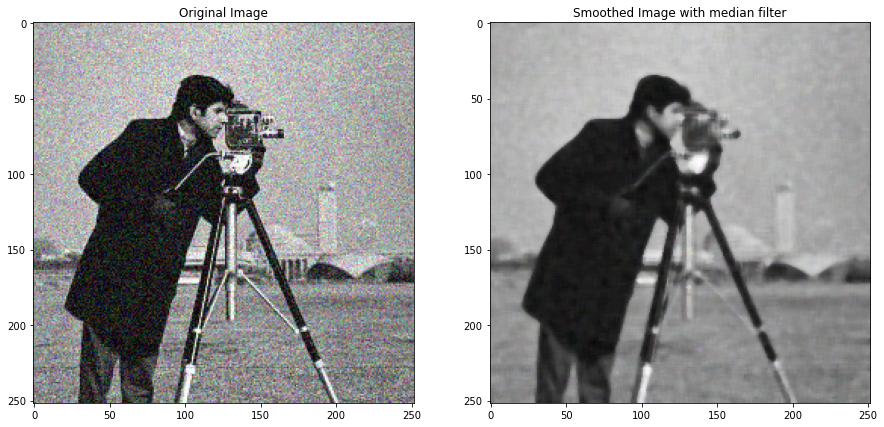

In [13]:
# Apply the median filter
ImG_smooth_median = scipy.ndimage.median_filter(Im_gauss, size=5)

# Plot the results
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(Im_gauss)
plt.subplot(1,2,2)
plt.title('Smoothed Image with median filter')
plt.imshow(ImG_smooth_median)
plt.show()

The median filter performs more or less the same for the gaussian noise, this filter takes the median of all the levels in the selected neighborhood.


Salt & pepper noise:

**d)** Apply the three Gaussian filters, described in problem 3, to the image `Im_SP`. Explain the results.

**e)** Apply a median filter on the image `Im_SP` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?

### Solution for section d)

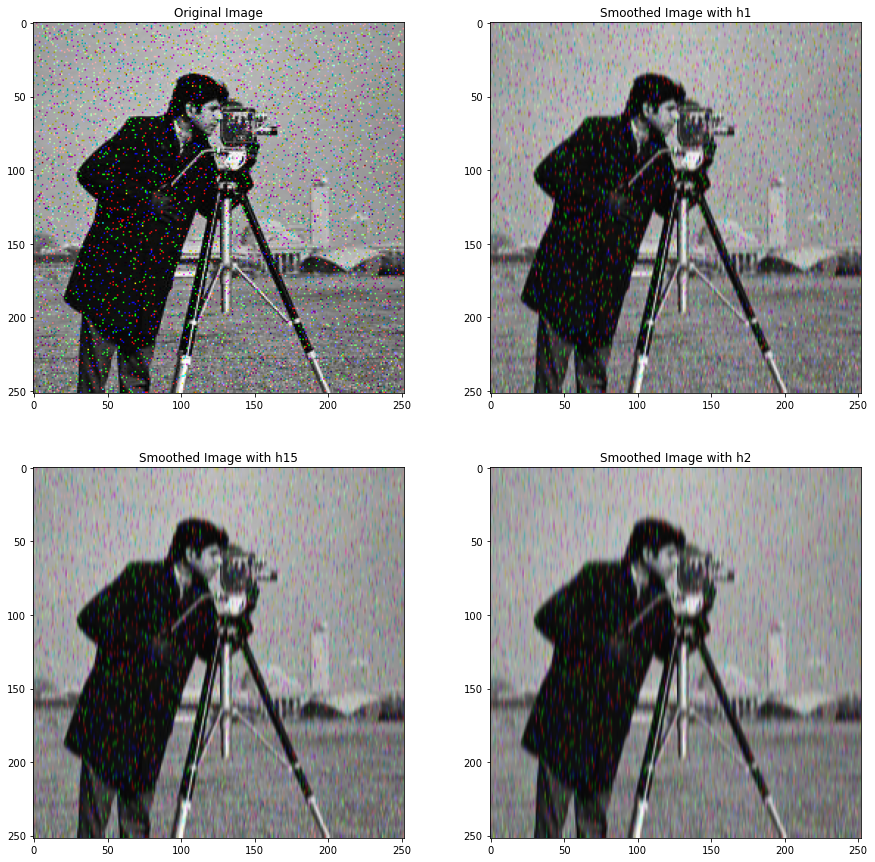

In [14]:
# Generate some random salt and pepper noise
Im_SP = random_noise(Im, 's&p', amount=0.05)

# Apply the different kernels from problem 3
ImSP_smooth_h1 = cv2.filter2D(Im_SP, -1, h1)
ImSP_smooth_h15 = cv2.filter2D(Im_SP, -1, h15)
ImSP_smooth_h2 = cv2.filter2D(Im_SP, -1, h2)

# Plot the results
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(Im_SP)
plt.subplot(2,2,2)
plt.title('Smoothed Image with h1')
plt.imshow(ImSP_smooth_h1)
plt.subplot(2,2,3)
plt.title('Smoothed Image with h15')
plt.imshow(ImSP_smooth_h15)
plt.subplot(2,2,4)
plt.title('Smoothed Image with h2')
plt.imshow(ImSP_smooth_h2)
plt.show()

In this example we can notice gaussian filters doesn't give very well results for salt and pepper noise. We end up with a too blur image and we haven't substracted much noise.

### Solution for section e)

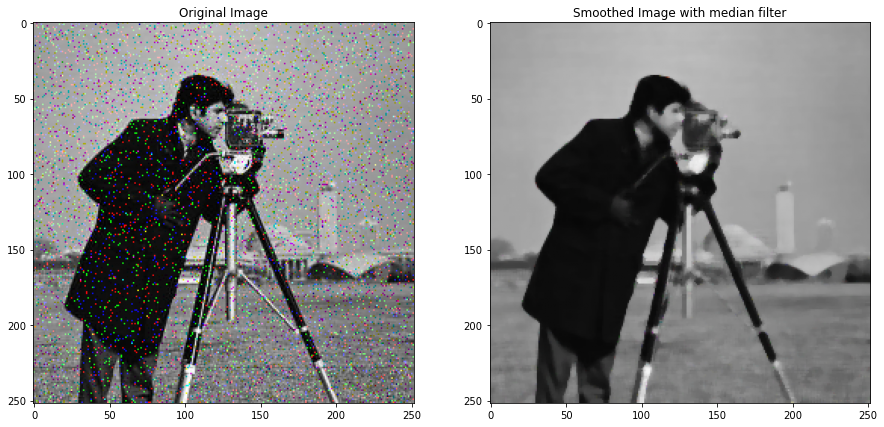

In [15]:
import scipy as sp

# Apply the median filter
ImSP_smooth_median = sp.ndimage.median_filter(Im_SP, size=5)

# Plot the results
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(Im_SP)
plt.subplot(1,2,2)
plt.title('Smoothed Image with median filter')
plt.imshow(ImSP_smooth_median)
plt.show()

Here we see the median filter performs in a very good way for the salt and pepper noise, we end up with an image without noise.

### Conclusion
In order to substract the gaussian noise we can apply either gaussian or median filter, nevertheless, we should keep in mind that the **median filter is a non-linear filter and therefore it is less efficient to apply than a linear filter**, if both filters performs similar result, we should consider using gaussian insted of median due to efficiency.

Furthermore, to substract salt and pepper noise, the gaussian filter doesn't performs very well, we should definitely choose the median filter.



### Delivery (dead line) on CANVAS: 03.10.2021 at 23.59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401
E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.
